<a href="https://www.kaggle.com/code/mostafaatefffff/combined-cycle-power-plant-dataset-predict-energy?scriptVersionId=216330633" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


# Reading Dataset

Data Set Information:
The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.

Attribute Information:
Features consist of hourly average ambient variables

Temperature (T) in the range 1.81°C and 37.11°C,
Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
Relative Humidity (RH) in the range 25.56% to 100.16%
Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
Net hourly electrical energy output (EP) 420.26-495.76 MW
The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.

In [2]:
df = pd.read_csv("/kaggle/input/airpressure/Folds5x2_pp.csv")
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


# Checking for missing values 

In [3]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [5]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


# Visualization of relations between columns 

In [6]:
correlation = df.corr()
correlation

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


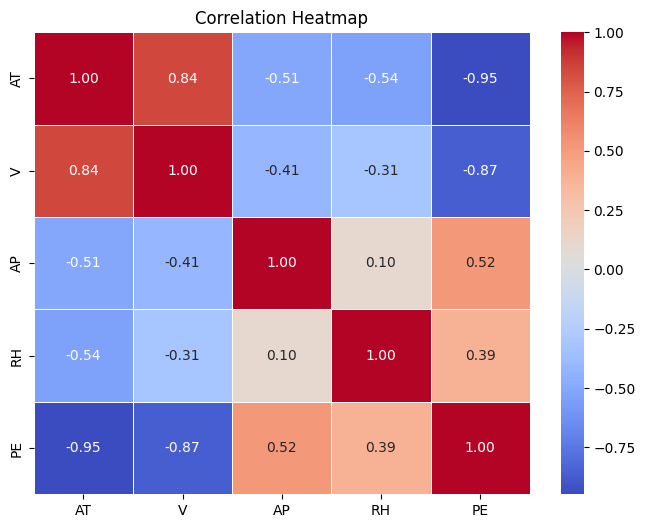

In [7]:
plt.figure(figsize=(8, 6))  # Adjust size as needed
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Text(0, 0.5, 'Predicted values')

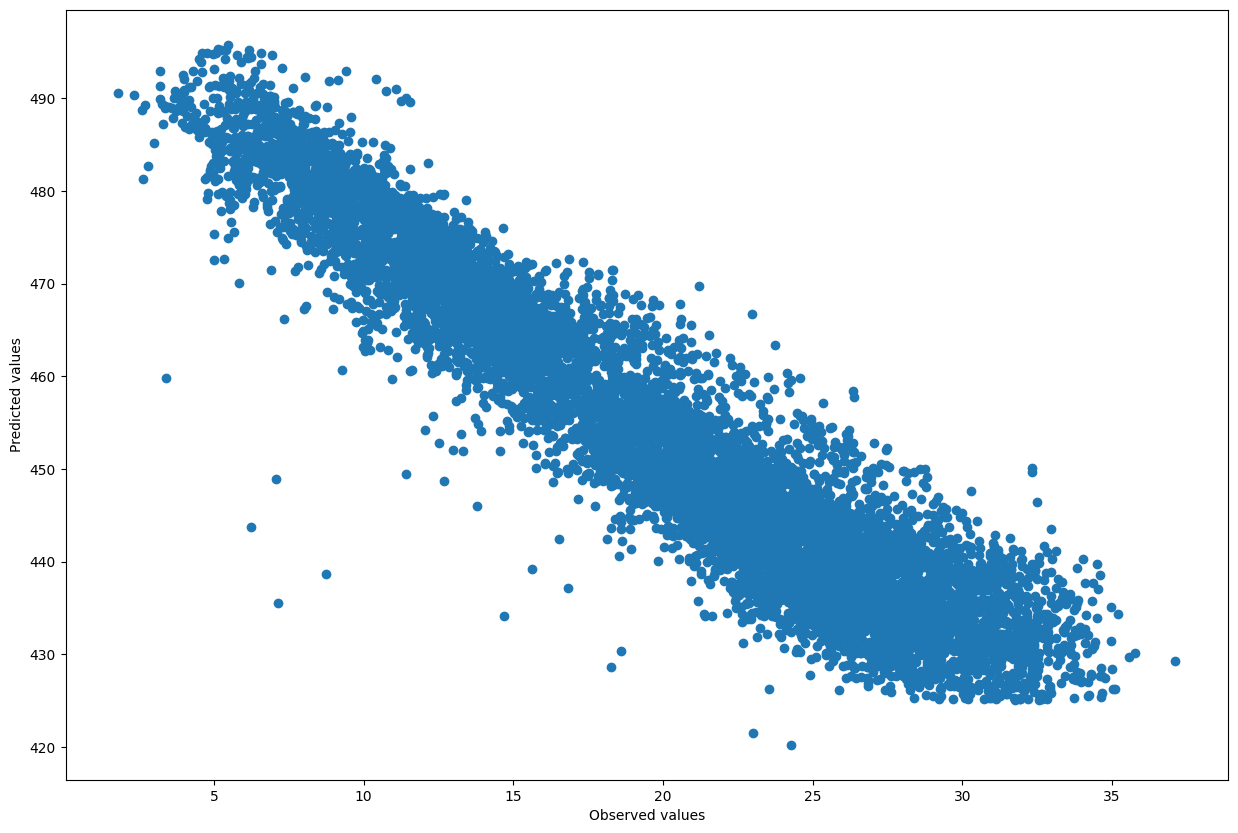

In [8]:
plt.figure(figsize = (15, 10))
plt.scatter(df["AT"], df["PE"])
plt.xlabel("Observed values")
plt.ylabel("Predicted values")

# Extracting Target column

In [9]:
X = df.drop('PE', axis=1).values
y = df['PE'].values

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling for Gredient Descent 

In [11]:
scaler = StandardScaler()


In [12]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Implementation of Gredient Descent for Linear Regression

In [13]:
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.cost_history = []
        
    def compute_cost(self, X, y):
        m = len(y)
        predictions = np.dot(X, self.weights) + self.bias
        cost = (1/(2*m)) * np.sum((predictions - y) ** 2)
        return cost
        
    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        for i in range(self.n_iterations):
            m = len(y)
            predictions = np.dot(X, self.weights) + self.bias
            
            dw = (1/m) * np.dot(X.T, (predictions - y))
            db = (1/m) * np.sum(predictions - y)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            cost = self.compute_cost(X, y)
            self.cost_history.append(cost)
            if i > 0 and abs(self.cost_history[-1] - self.cost_history[-2]) < 1e-6:
                break
            
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

## MSE function implementation 

In [14]:
def mse(y_test, predictions):
    return np.mean((y_test - predictions) ** 2)

## Fitting model (starting with 0.01 learning rate)

In [15]:
model = LinearRegressionGD(learning_rate=0.01, n_iterations=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# MSE and R2 for Evaluating the Model

In [16]:
mse_value = mse(y_test, y_pred)
print(f'MSE: {mse_value}')

MSE: 21.47709944171905


In [17]:
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

R2 Score: 0.9255347974093558


Text(0, 0.5, 'Predicted values')

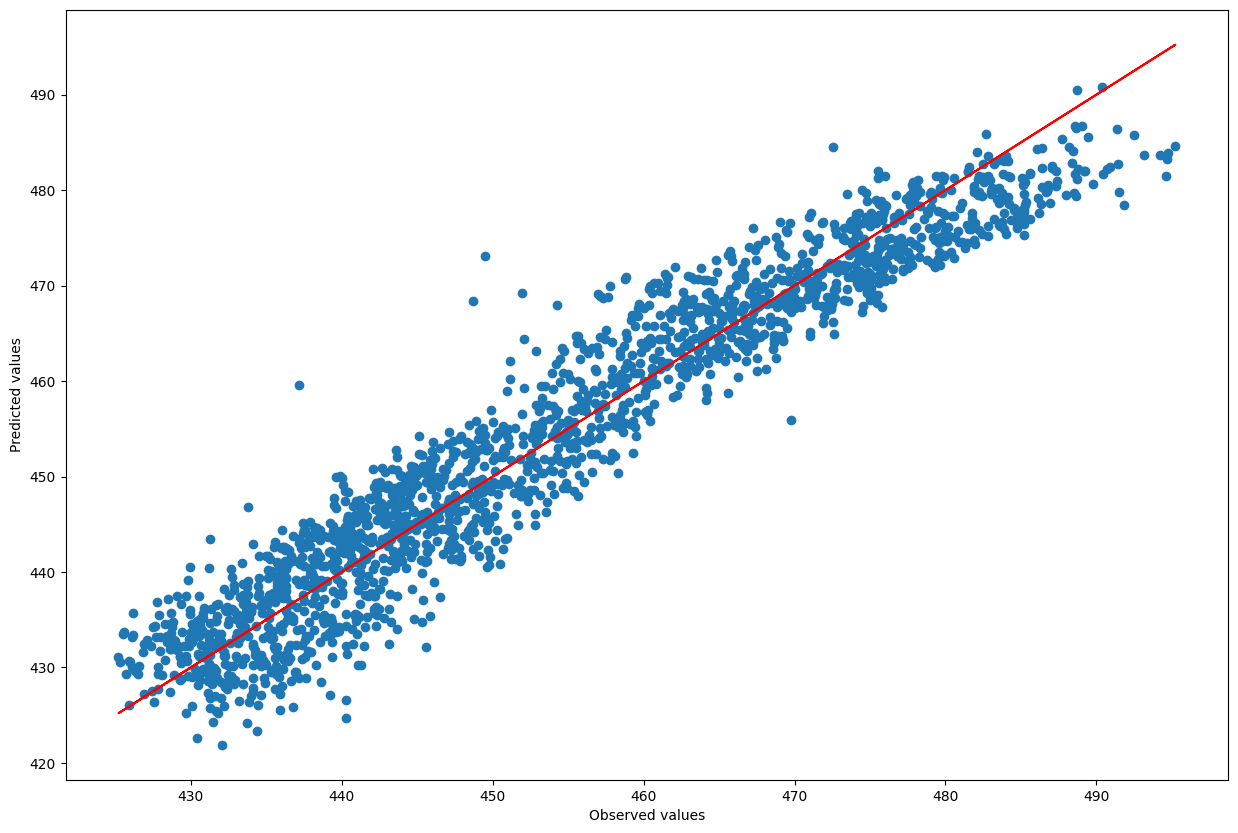

In [18]:
plt.figure(figsize = (15, 10))
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, 'r')
plt.xlabel("Observed values")
plt.ylabel("Predicted values")

# Plot Cost

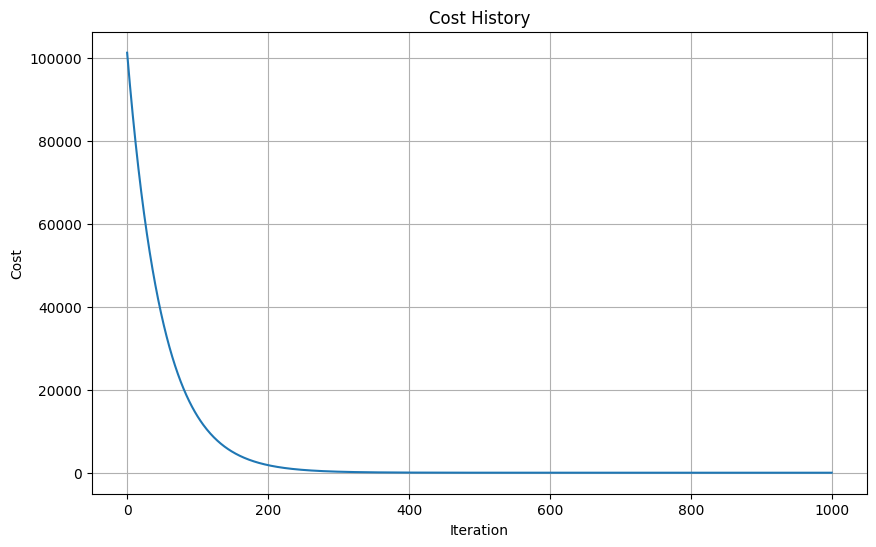

In [19]:
# Plot cost history
plt.figure(figsize=(10, 6))
plt.plot(model.cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost History')
plt.grid(True)
plt.show()

# Hybertuning 

In [20]:
model = LinearRegressionGD(learning_rate=0.1, n_iterations=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [21]:
mse_value = mse(y_test, y_pred)
print(f'MSE: {mse_value}')

MSE: 20.2177132334072


In [22]:
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

R2 Score: 0.9299013297428439


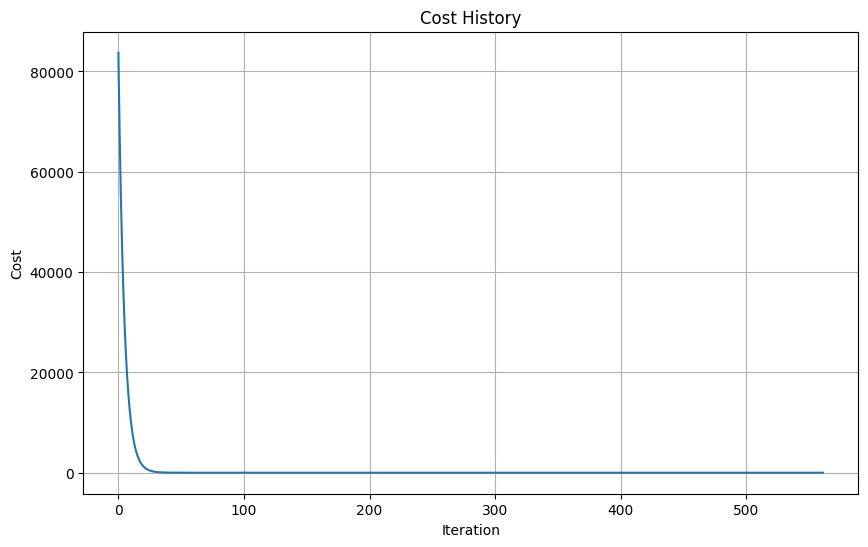

In [23]:
# Plot cost history
plt.figure(figsize=(10, 6))
plt.plot(model.cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost History')
plt.grid(True)
plt.show()

In [24]:
model = LinearRegressionGD(learning_rate=0.5, n_iterations=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [25]:
mse_value = mse(y_test, y_pred)
print(f'MSE: {mse_value}')

MSE: 20.217996089235925


In [26]:
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

R2 Score: 0.9299003490277037


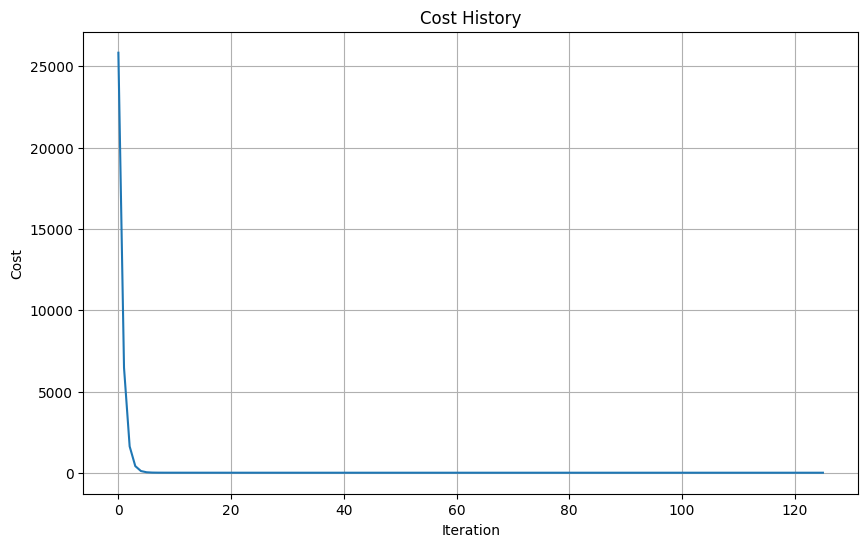

In [27]:
# Plot cost history
plt.figure(figsize=(10, 6))
plt.plot(model.cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost History')
plt.grid(True)
plt.show()

# Implementing Linear Regression using Sklearn

In [28]:
ml = LinearRegression()
ml.fit(x_train, y_train)

LinearRegression()

In [29]:
y_pred = ml.predict(x_test)
print(y_pred)

[433.36241603 448.38864548 445.88661799 ... 456.06061126 446.91190634
 432.57326179]


In [30]:
# Calculate and print MSE
mse_value = mse(y_test, y_pred)
print(f'MSE: {mse_value}')

MSE: 20.21824977703789


In [31]:
r2_score(y_test, y_pred)

0.929899469443679

Text(0, 0.5, 'Predicted values')

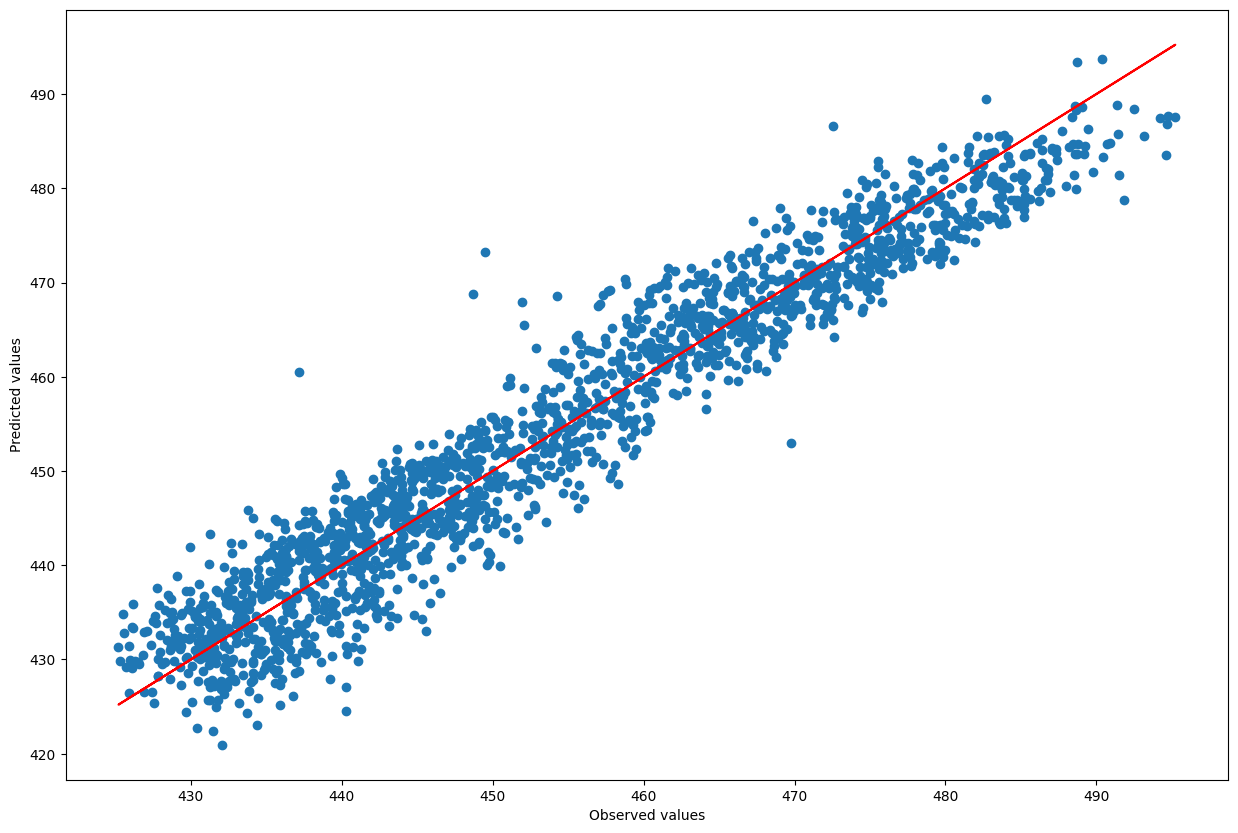

In [32]:
plt.figure(figsize = (15, 10))
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, 'r')
plt.xlabel("Observed values")
plt.ylabel("Predicted values")